In [60]:
### SVM Classfication:-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [61]:
data=pd.read_csv("D:\\Excel R\\Assignments\\Assignment 17\\forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [63]:
d1=data.drop(data.iloc[:,11:30],axis=1)
d1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [64]:
d1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

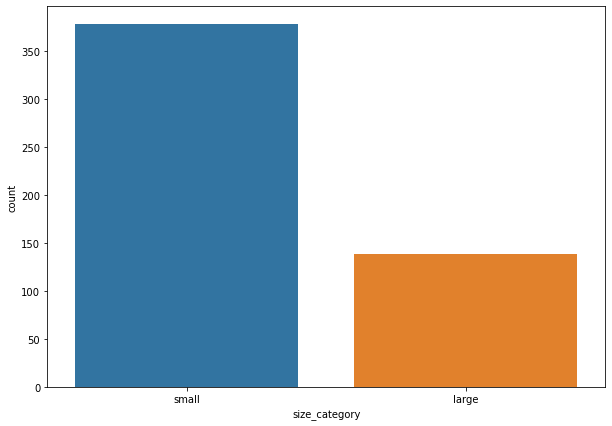

In [65]:
### Countplot:-
plt.figure(figsize=(10,7))
sns.countplot(d1.size_category)

<AxesSubplot:>

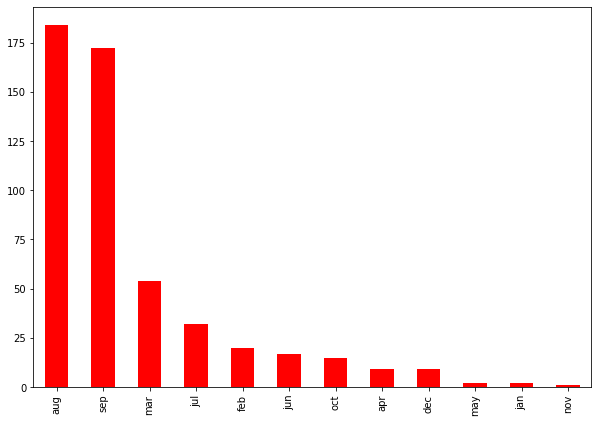

In [66]:
plt.figure(figsize=(10,7))
d1.month.value_counts().plot(kind='bar',color='red')

<AxesSubplot:>

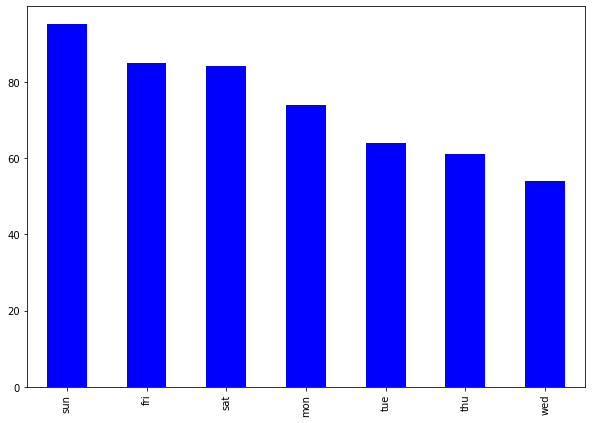

In [67]:
plt.figure(figsize=(10,7))
d1.day.value_counts().plot(kind='bar',color='blue')

<AxesSubplot:xlabel='day', ylabel='wind'>

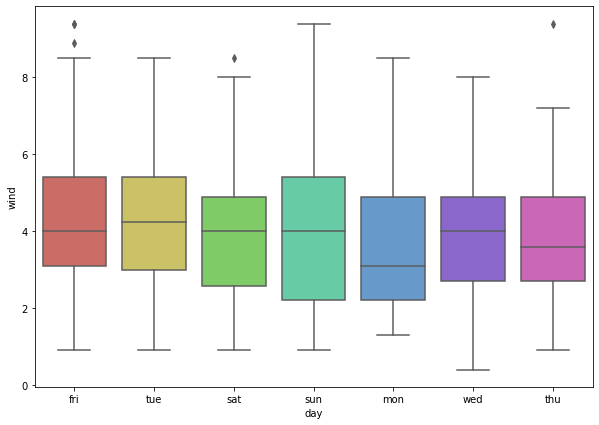

In [68]:
### Boxplots:-
plt.figure(figsize=(10,7))
sns.boxplot(x='day',y='wind',data=d1,palette='hls')

<AxesSubplot:xlabel='day', ylabel='temp'>

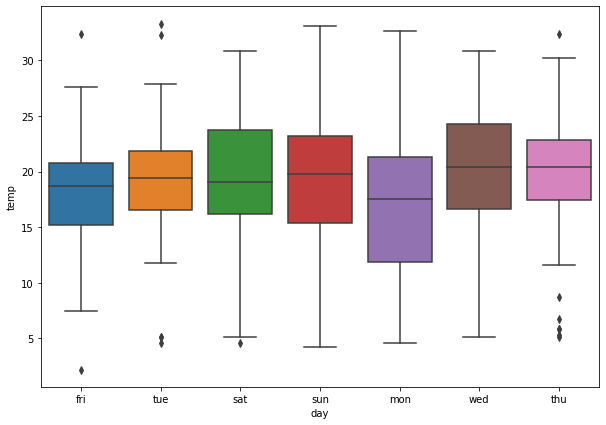

In [69]:
plt.figure(figsize=(10,7))
sns.boxplot(x='day',y='temp',data=d1)

In [70]:
d1.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),('1','2','3','4','5','6','7','8','9','10','11','12'),inplace=True) 

In [71]:
d1.day.replace(('mon','tue','wed','thu','fri','sat','sun'),('1','2','3','4','5','6','7'),inplace=True)
d1.size_category.replace(('small','large'),('0','1'),inplace=True)

In [72]:
x=d1.iloc[:,0:11]
y=d1.iloc[:,11]

In [73]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Algorithm for Best Parameter:-

In [74]:
clf=SVC()
param_grid=[{'kernel':['rbf','poly','sigmoid'],'gamma':[5,10,0.5,0.1],'C':[30,25,20,15,10,0.1]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [30, 25, 20, 15, 10, 0.1],
                          'gamma': [5, 10, 0.5, 0.1],
                          'kernel': ['rbf', 'poly', 'sigmoid']}])

In [75]:
print(gsv.best_params_ , gsv.best_score_)

{'C': 30, 'gamma': 5, 'kernel': 'poly'} 0.9734030197444831


## Building the model on best parameters:-



In [77]:
clf = SVC(C=30, gamma=5,kernel='poly')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = (np.mean(y_pred==y_test)*100)
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 95.1923076923077


array([[72,  2],
       [ 3, 27]], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.93      0.90      0.92        30

    accuracy                           0.95       104
   macro avg       0.95      0.94      0.94       104
weighted avg       0.95      0.95      0.95       104

